# Ejercicios Básicos de Procesamiento de Imágenes
## Gabriel Daniel Aguilar Luna
### _Facultad de Ingeniería, Universidad Nacional Autónoma de México_
### _Ciudad de México, México_
#### gabriel.aguilar@ingenieria.unam.edu
***
Realice los siguientes ejercicios. Conteste las preguntasy haga las modificaciones pedidas en algunos de los ejercicios. Las preguntas y modificaciones están resaltadas en negritas en el documento.
***

## 1.Abrir y escribir una imagen a un archivo

In [97]:
import cv2
from scipy import misc
import imageio as io
mapache = misc.face()
io.imsave('face.png', mapache)
mapache_gris = misc.face(gray = True)
io.imsave('gray_face.png', mapache_gris)

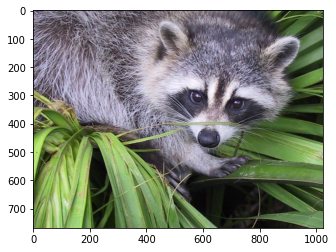

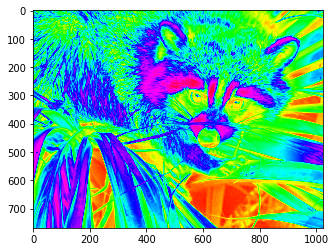

In [98]:
import matplotlib.pyplot as plt
plt.imshow(mapache)
plt.show()
plt.imshow(mapache_gris)
plt.show()

***

## 2.Creación de un arreglo numpy de un archivo de imagen

In [4]:
face = io.imread('face.png') # Se lee la imagen png
type(face)

imageio.core.util.Array

In [5]:
face.shape, face.dtype

((768, 1024, 3), dtype('uint8'))

In [6]:
mapache_gris.shape, mapache_gris.dtype

((768, 1024), dtype('uint8'))

__¿De qué tipo es la variable face?__

Es de tipo: unit8

__¿Qué resultado arroja face.shape?__

Las dimensiones del arreglo.

__Si fuera una imagen en tonos de gris, ¿cuál sería el resultado esperadode face.shape?__

El arreglo pierde una dimensión, la del color en este caso en RGB, de tal forma que el resultado de shape es: (768, 1024)

***

## 3.Abrir archivos raw

In [11]:
import numpy as np

face.tofile('face.raw') # Se crea el archivo raw binario
face_from_raw = np.fromfile('face.raw', dtype=np.uint8)
face_from_raw.shape

(2359296,)

In [13]:
face_from_raw.shape = (768, 1024, 3)
face_from_raw.shape

(768, 1024, 3)

__¿Qué resultado arroja la primera instrucción face_from_raw.shape?__

Como proviene de un archivo raw, no tiene formato. Toda la informacion esta en un arreglo de 1x2359296.

2359296 es el resultado de multiplicar 768x1024x3.

<br>
Note que al leer archivos raw, es necesario conocer la forma de los datos, especificada con la instrucción face_from_raw.shape= (...), así comoel tipo de la imagen, especificado con dtype=np.uint8.

Para datos grandes, use <br>np.memmap:face_memmap = np.memmap('face.raw', dtype=np.uint8, shape=(768, 1024, 3)<br>Con memmap, los datos se leen del archivoy no se cargan en la memoria.

***

## 4.Despliegue de imágenes
Usematplotlibeimshowpara desplegar una imagen dentro de una figura de matplotlib:

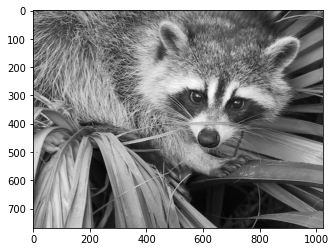

In [15]:
import matplotlib.pyplot as plt
plt.imshow(mapache_gris, cmap=plt.cm.gray)

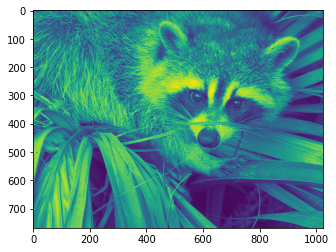

In [16]:
plt.imshow(mapache_gris)

__¿Qué pasa si al desplegar la imagen con plt.imshow no se especifica el mapa de colorplt.cm.gray?__

La imagen se muestra con colores del colormap Viridis.

__¿Cuál es el mapa de color defaultde imshow?__

Viridis

__Imprima la forma de mapache_gris(propiedad shape de mapache_gris) y compare contra la forma de la misma imagena color.__

In [18]:
mapache_gris

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [19]:
face

Array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

Podemos observar que el arreglo e mapache_gris es mucho más pequeño, exactamente 3 veces más pequeño, ya que el arreglo de face guarda la informacion de los colores en RGB, por lo que necesita 3 veces más información que mapache_girs.

(-0.5, 1023.5, 767.5, -0.5)

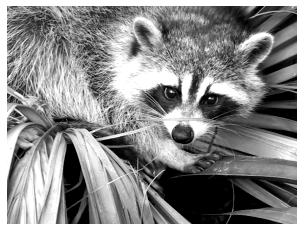

In [22]:
#Se puede incrementar el contraste especificando los valores mínimo y máximo en el despliegue:
plt.imshow(mapache_gris, cmap=plt.cm.gray, vmin=30, vmax=200)
# Remueve los ejes y las marcas(ticks)
plt.axis('off')

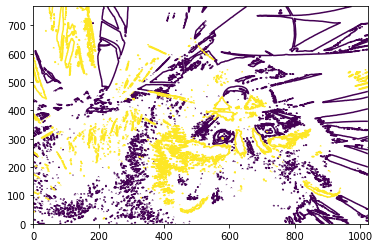

In [35]:
#Se pueden dibujar líneas de contorno con la instrucción contour.
plt.contour(mapache_gris, [50, 200])

(-0.5, 1023.5, 767.5, -0.5)

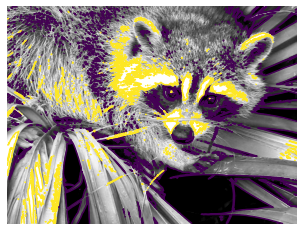

In [36]:
plt.contour(mapache_gris, [50, 200])
plt.imshow(mapache_gris, cmap=plt.cm.gray, vmin=30, vmax=200)
# Remueve los ejes y las marcas(ticks)
plt.axis('off')

__Investigue y ponga una breve descripción sobrela instrucción contour.__

Contour, también conocido como niveles de ploteo es una herramienta para hacer un análisis multivariable y para visualizar figuras de 3 dimensiones en 2 dimensiones.
Sirve para visualizar densidad, altitudes, alturas, etc.

Obtenga y despliegue los contornos de la imagen contour_gray.png con las siguientes instrucciones(antesdebe cargar la imagen contour_gray.png en la variable c_gray):

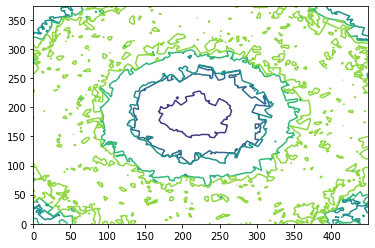

In [69]:
c_gray = io.imread('contour_gray.png')

plt.contour(c_gray, 5)

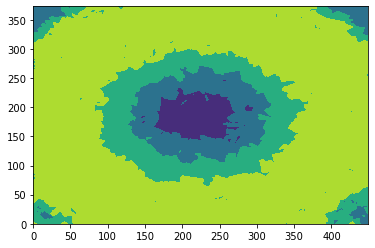

In [70]:
plt.contourf(c_gray, 3)

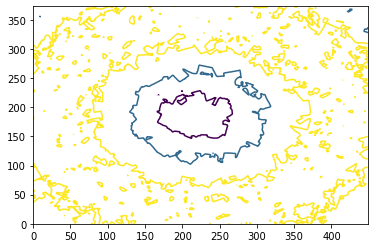

In [71]:
plt.contour(c_gray, [50, 100, 200])

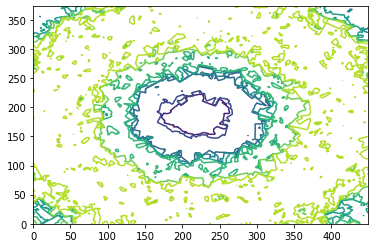

In [72]:
plt.contour(c_gray, 8)

***

# 5.Manipulaciones básicas
Las imágenes son arreglos, por lo que podemos usar la maquinaria de numpy.

__¿Cuánto vale el pixel face[0, 40]?__

In [73]:
# Obtieneel valor de un pixel de la imagen
mapache_gris[0, 40]

127

In [74]:
# Accesando secciones dela imagen
mapache_gris[10:13, 20:23]


array([[141, 153, 145],
       [133, 134, 125],
       [ 96,  92,  94]], dtype=uint8)

__¿Qué efecto tiene la instrucción face[100:120] = 255en la imagen de abajo?__

Dibuja una linea blanca, por el 255, en las filas 100 a 120 de pixeles de la imagen.

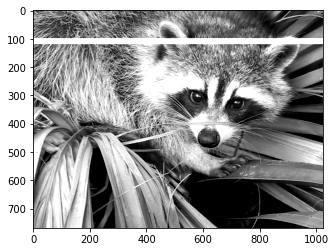

In [163]:
mapache_gris = misc.face(gray = True)
mapache_gris[100:120] = 255
plt.imshow(mapache_gris, cmap=plt.cm.gray, vmin=30, vmax=200)

__Pinte una franjavertical grisen la imagen que vaya de la columna 200 a la columna 220.__

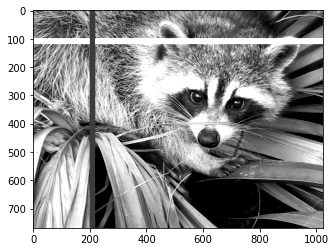

In [164]:
mapache_gris[:, 200:220] = 70
plt.imshow(mapache_gris, cmap=plt.cm.gray, vmin=30, vmax=200)

In [165]:
lx,ly = mapache_gris.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X -lx / 2) ** 2 + (Y -ly / 2) ** 2 > lx * ly / 4
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

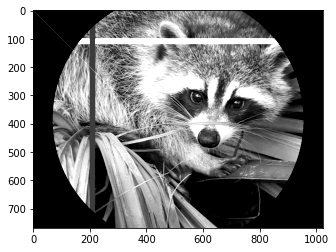

In [166]:
# Masks
mapache_gris[mask] = 0
# Indexado con rangos
mapache_gris[range(400), range(400)] = 255
plt.imshow(mapache_gris, cmap=plt.cm.gray, vmin=30, vmax=200)

__¿Cuánto vale lx, ly?__

Tienen los valores de 768 y 1024 respectivamente, que es el tamaño del arreglo de la imagen.

__¿Qué efecto tiene en la imagenla instrucción face[range(400), range(400)] = 255?__

Dibuja una linea diagonal blanca desde la coordenada 0,0 hasta la 400,400.

__Modifique el código para que la máscara sea un círculo más pequeño y despliegue el resultado.__

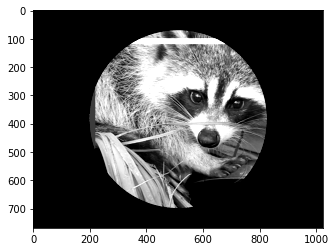

In [167]:
mask = (X -lx / 2) ** 2 + (Y -ly / 2) ** 2 > lx * ly / 8
mapache_gris[mask] = 0
plt.imshow(mapache_gris, cmap=plt.cm.gray, vmin=30, vmax=200)

In [168]:
#InformaciónEstadística.
#Se puede obtener información estadística de la imagen usando el módulo misc.

face = misc.face(gray=True)
face.mean(), face.max(), face.min()

(113.48026784261067, 250, 0)

<BarContainer object of 256 artists>

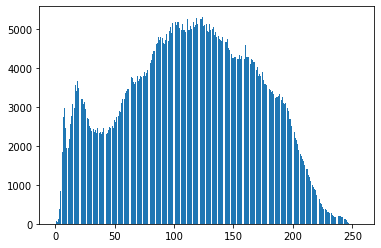

In [169]:
#Una manera de obtener el histograma es con la instrucción histogramde numpy.

hist, bins = np.histogram(face, bins=256, range=(0,256))
plt.bar(bins[0:-1], hist)

__Modifique el código para que sólo se tengan 64 binsen el histograma y muestre el histograma resultante.__

<BarContainer object of 64 artists>

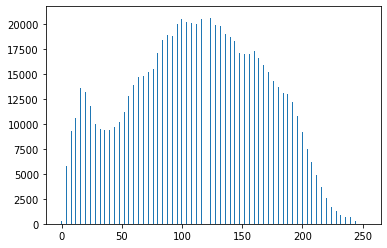

In [170]:
hist, bins = np.histogram(face, bins=64, range=(0,256))
plt.bar(bins[0:-1], hist)

__Transformacionesgeométricas__

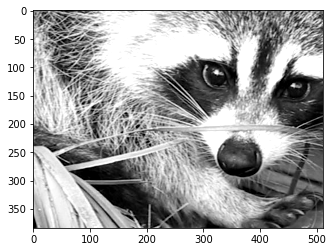

In [171]:
face = misc.face(gray=True)
lx, ly = face.shape
# Recorte
crop_face = face[lx // 4: -lx // 4, ly // 4: -ly // 4]
plt.imshow(crop_face, cmap=plt.cm.gray, vmin=30, vmax=200)

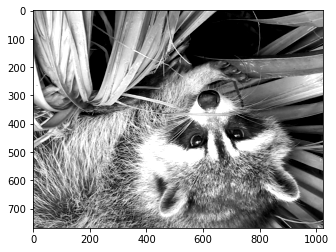

In [172]:
# up <-> down Voltear verticalmente
flip_ud_face = np.flipud(face)
plt.imshow(flip_ud_face, cmap=plt.cm.gray, vmin=30, vmax=200)

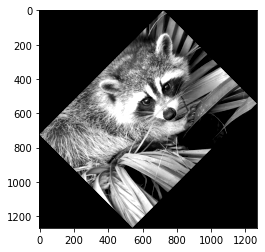

In [173]:
# Rotación
from scipy import ndimage
rotate_face = ndimage.rotate(face, 45)
plt.imshow(rotate_face, cmap=plt.cm.gray, vmin=30, vmax=200)

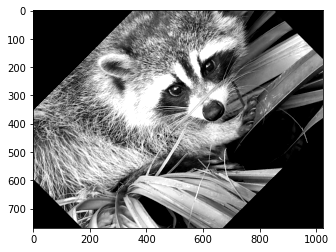

In [174]:
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)
plt.imshow(rotate_face_noreshape, cmap=plt.cm.gray, vmin=30, vmax=200)

__Investigue el operador // y ponga una breve descripción.__

El operador // en python simboliza la division trunca o entera, el resultado de una division se redondea siempre hacia el entero hacia abajo.

__¿Qué efecto tiene elsigno negativo en crop_face = face[lx // 4: -lx // 4, ly // 4: -ly // 4]?__

Se utiliza para indicar el limite del arreglo desde su final. Por ejemplo -200 en ese caso significaria que no se toman del arreglo las ultimas 200 posiciones.


__Voltee la imagen original del mapache, pero esta vez horizontalmente,de izquierda a derecha.__

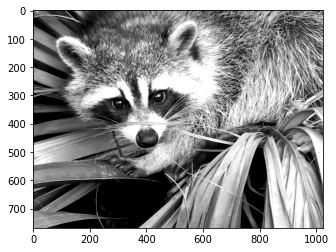

In [175]:
face_flip_lr = np.fliplr(face)
plt.imshow(face_flip_lr, cmap=plt.cm.gray, vmin=30, vmax=200)

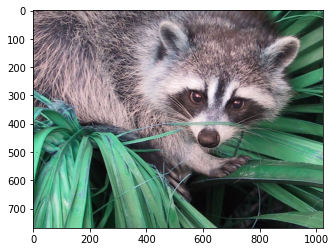

In [99]:
img = cv2.imread("./face.png")
plt.imshow(img)

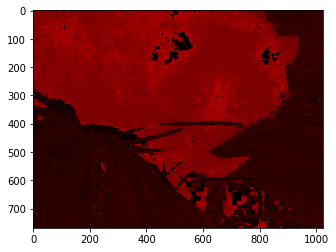

In [112]:
img = cv2.imread("./face.png")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #Convertir a escala de hsv
img_hsv[:,:,1] = 0
img_hsv[:,:,2] = 0
#img_hsv = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
plt.imshow(img_hsv)


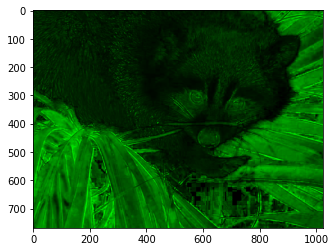

In [113]:
img = cv2.imread("./face.png")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #Convertir a escala de hsv
img_hsv[:,:,0] = 0
img_hsv[:,:,2] = 0
#img_hsv = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
plt.imshow(img_hsv)

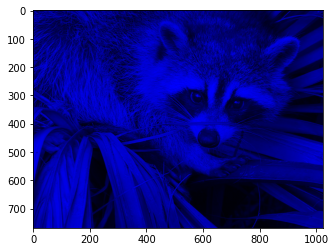

In [141]:
img = cv2.imread("./face.png")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #Convertir a escala de hsv
img_hsv[:,:,0] = 0
img_hsv[:,:,1] = 0
#img_hsv = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
plt.imshow(img_hsv)

In [131]:
img_hsv[:,:,0]

array([[134, 134, 133, ...,  34,  33,  33],
       [132, 132, 131, ...,  34,  34,  34],
       [132, 132, 132, ...,  35,  35,  35],
       ...,
       [ 49,  47,  46, ...,  49,  49,  49],
       [ 47,  47,  45, ...,  48,  47,  47],
       [ 48,  47,  46, ...,  48,  47,  47]], dtype=uint8)

In [132]:
img_hsv[:,:,1]

array([[ 37,  33,  32, ..., 105, 101,  96],
       [ 46,  38,  37, ..., 110,  98,  90],
       [ 55,  44,  36, ..., 111,  99,  92],
       ...,
       [ 72,  67,  66, ...,  98,  99, 102],
       [ 73,  67,  62, ...,  99, 101, 101],
       [ 68,  65,  59, ..., 100, 102, 103]], dtype=uint8)

In [133]:
img_hsv[:,:,2]

array([[131, 148, 165, ..., 126, 136, 144],
       [100, 121, 143, ..., 125, 141, 153],
       [ 84, 105, 126, ..., 126, 142, 153],
       ...,
       [106, 110, 124, ..., 158, 157, 158],
       [101, 111, 127, ..., 157, 156, 156],
       [101, 113, 126, ..., 156, 155, 154]], dtype=uint8)

In [134]:
img_hsv[:,:,0].shape

(768, 1024)

In [135]:
h,s,v = cv2.split(img_hsv)

In [136]:
h

array([[134, 134, 133, ...,  34,  33,  33],
       [132, 132, 131, ...,  34,  34,  34],
       [132, 132, 132, ...,  35,  35,  35],
       ...,
       [ 49,  47,  46, ...,  49,  49,  49],
       [ 47,  47,  45, ...,  48,  47,  47],
       [ 48,  47,  46, ...,  48,  47,  47]], dtype=uint8)

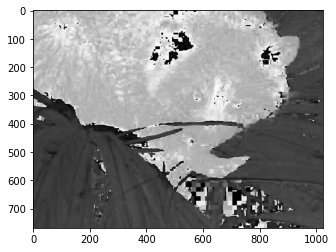

In [137]:
plt.imshow(h, cmap=plt.cm.gray)

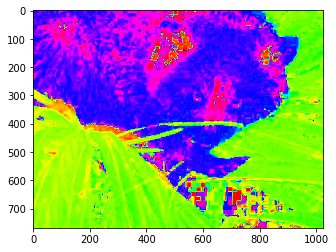

In [138]:
plt.imshow(h, cmap=plt.cm.hsv)

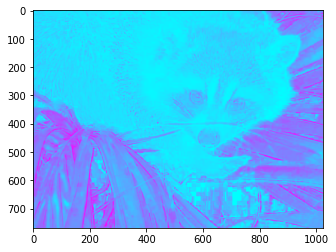

In [139]:
plt.imshow(s, cmap=plt.cm.cool)

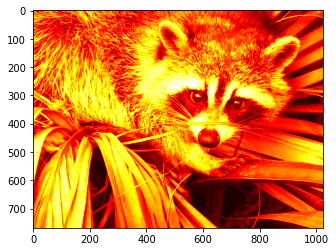

In [140]:
plt.imshow(v, cmap=plt.cm.hot)

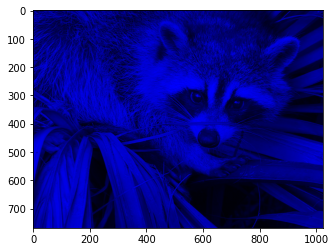

In [148]:
color = "he"
#plt.imshow(h if color.lower() == "hue" else s if color.lower() == "saturation" else v if color.lower() == "value" else plt.cm.gray, cmap = plt.cm.hsv if color.lower() == "hue" else plt.cm.cool if color.lower() == "saturation" else plt.cm.hot if color.lower() == "value" else plt.cm.gray)
plt.imshow(h, cmap = plt.cm.hsv) if color.lower() == "hue" else plt.imshow(s, cmap = plt.cm.cool) if color.lower() == "saturation" else plt.imshow(v, cmap = plt.cm.hot) if color.lower() == "value" else plt.imshow(img_hsv)